In [48]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt


In [49]:
#En el módulo " decomposition " encontraremos todo sobre decomposición
from sklearn.decomposition import PCA #Importamos nuestro algoritmos de PCA. 
from sklearn.decomposition import IncrementalPCA #Importamos nuestros algoritmo "PCA Simple"

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [50]:
dt_heart = pd.read_csv('Datasets/heart.csv')
dt_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## PCA and IPCA
**Primero:** Preparamos nuestros datos normalizandolos y separandolos en datos de prueba y entrenamiento

In [51]:
df_target = dt_heart['target']
df_features = dt_heart.drop('target', axis=1)


Recuerda que cuando normalizamos nuestros datos primero lo centramos a 0 (le restamos el promedio) ; y, luego, lo reescalamos( lo dividimos entre la desv. estandar)

In [52]:


#Podemos hacerlo como lo siguiente
# Scaler = StandardScaler()
# Scaler.fit(df_features)
# df_features= Scaler.transform(df_features)
# df_features
##O de una manera más corta como a continuación

df_features= StandardScaler().fit_transform(df_features)
df_features

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

In [53]:
#Procedemos a dividir nuestros datos para entrenamieto y prueba
X_train, X_test, Y_train, Y_test = train_test_split(df_features, df_target, test_size = 0.3, random_state=42)

In [54]:
#Remember to do this! to see the right dimensions
print(X_train.shape)
print(Y_train.shape)

(717, 13)
(717,)


**Segundo:** Procedemos a implementar el algoritmo que nos ayudará a reducir nuestras dimensiones

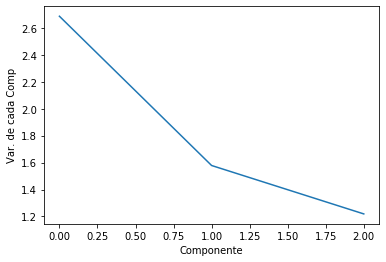

In [55]:

#n_components = min(n_muestras, n_features)   :: Está así por defecto
pca = PCA(n_components=3) #Probaremos con solo 3 componentes
pca.fit(X_train) #Ajustamos el PCA a los datos de X_train


ipca = IncrementalPCA(n_components = 3, batch_size=10) # "batch_size" es el tamaño de datos que tomará PCA (Esto es con fines de ahorro de recuros computacionales)
ipca.fit(X_train)

plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_) 
plt.xlabel('Componente')
plt.ylabel('Var. de cada Comp')
         #Mediremos la varianza de los componentes que extrae al ejecutarse nuestro PCA and IPCA
plt.show()

En el gráfico, podemos observar que los 2 primeros componentes tienen mayor varianza: El primero nos dá 2.68 y el segundo 1.57 que son los mayores de los 3

In [56]:
pca.explained_variance_

array([2.68677712, 1.57833496, 1.21873514])

**Tercero:** Procedemos a implementar nuestra regresión logística pa luego comparar los resultados de PCA and IPCA

In [65]:
logistic =LogisticRegression(solver='lbfgs')
#Transformamos nuestros datos con PCA para reducir la dimensionalidad
dt_train = pca.transform(X_train)
dt_test  = pca.transform(X_test)
logistic.fit(dt_train, Y_train)
print("SCORE PCA:", logistic.score(dt_test, Y_test))

SCORE PCA: 0.7857142857142857


In [64]:
dt_train = ipca.transform(X_train)
dt_test  = ipca.transform(X_test)
logistic.fit(dt_train, Y_train)
print("SCORE IPCA:", logistic.score(dt_test, Y_test))

SCORE IPCA: 0.8051948051948052
